In [1]:
import Bio

import openpyxl
from Bio import SeqIO
import os,sys,re

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

from collections import Counter

import scipy as sp
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

pandas 1.5.2
numpy 1.23.5
matplotlib 3.4.1
scipy 1.10.0
seaborn 0.12.2


In [2]:
##Import df
df_del = pd.read_csv("deleterious_all_azoles_2023-07-11.csv")
df_dms = pd.read_csv("./select_coef_all_conditions_CB_2023-12-07.csv", header=0)
df_foldx = pd.read_csv("./foldx_CaERG11.csv", header=0)

df_foldx = df_foldx[df_foldx["Antifungal"]=="Itra"]

df_dms = df_dms[df_dms["aa"]!=df_dms["aa_WT"]].reset_index()

In [3]:
## create a new column called name

df_foldx['variant'] = df_foldx['position'].astype(str) + df_foldx['aa']
df_foldx['name'] = df_foldx['position'].astype(str) + df_foldx['aa'] + "_"+ df_foldx['Antifungal']
df_dms['name'] = df_dms['variant'] + "_"+ df_dms['Antifungal']

In [4]:
#group by antifungals

merged_df_group = df_dms.dropna().groupby("Antifungal")

df_none = merged_df_group.get_group("None").reset_index()
df_fluco = merged_df_group.get_group("Fluco").reset_index()
df_itra = merged_df_group.get_group("Itra").reset_index()
df_vorico = merged_df_group.get_group("Vorico").reset_index()
df_posaco = merged_df_group.get_group("Posaco").reset_index()

In [5]:
none_df_del = df_none[df_none["result"]=="Deleterious"]
none_df_del

,level_0,index,Unnamed: 0.1,Unnamed: 0,position,Antifungal,aa,select_coef,p_value,adjusted_p_value,variant,result,aa_WT,name
0,0,0,0,0,55,None,*,-0.528211,8.240903e-210,8.053801e-209,55*,Deleterious,I,55*_None
3,3,3,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,Deleterious,I,55D_None
41,41,42,42,42,58,None,D,-0.130006,8.700307e-43,5.428482e-42,58D,Deleterious,F,58D_None
42,42,43,43,43,58,None,E,-0.058642,3.003058e-11,1.494119e-10,58E,Deleterious,F,58E_None
46,46,48,48,48,58,None,K,-0.034681,8.910441e-06,3.914667e-05,58K,Deleterious,F,58K_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,3811,4002,4002,4002,511,None,A,-0.032671,1.956748e-03,7.400098e-03,511A,Deleterious,L,511A_None
3815,3815,4006,4006,4006,511,None,F,-0.024764,9.777338e-04,3.831941e-03,511F,Deleterious,L,511F_None
3821,3821,4013,4013,4013,511,None,N,-0.025212,5.000708e-04,2.012365e-03,511N,Deleterious,L,511N_None
3825,3825,4017,4017,4017,511,None,S,-0.027139,1.626092e-03,6.210924e-03,511S,Deleterious,L,511S_None


In [6]:
##merge the dfs

#foldx data on the df with deleterious variants for all azoles
merged_df_del_all = df_del.merge(df_foldx, on='variant', how='inner', suffixes=('_dms', '_foldx'))

#foldx data on the df with deleterious variants in none
merged_df_del_none = none_df_del.merge(df_foldx, on='variant', how='inner', suffixes=('_dms', '_foldx'))

#all foldx data on dms data
merged_df = df_dms.merge(df_foldx, on='name', how='inner', suffixes=('_dms', '_foldx'))

#add a column 
merged_df_del_all['Deleterious without azoles'] = merged_df_del_all['variant'].isin(merged_df_del_none['variant'])

In [7]:
merged_df_del_all

,Unnamed: 0,variant,s fluco,s itra,s vorico,s posaco,s isa,s clotri,position_dms,position_foldx,wt,aa,ddGbind_lig,Antifungal,ddG,ddGbind_hem,name,Deleterious without azoles
0,1,55D,-0.706814,-0.481650,-0.545815,-0.349018,-0.373303,-0.537737,55,55,I,D,-0.07693,Itra,1.38678,0.00000,55D_Itra,True
1,2,55E,-0.610011,-0.393626,-0.432500,-0.351371,-0.363802,-0.407222,55,55,I,E,-0.10883,Itra,0.57731,0.00000,55E_Itra,False
2,3,55H,-0.561415,-0.335860,-0.400190,-0.222416,-0.219221,-0.368161,55,55,I,H,0.00045,Itra,0.59022,0.00000,55H_Itra,False
3,4,55K,-0.535107,-0.326617,-0.452815,-0.251856,-0.408495,-0.445417,55,55,I,K,0.03958,Itra,0.38984,0.00000,55K_Itra,False
4,5,55N,-0.426395,-0.248775,-0.348678,-0.179852,-0.174113,-0.381746,55,55,I,N,0.00000,Itra,1.22242,0.00000,55N_Itra,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2199,510Y,-0.681292,-0.620414,-0.567502,-0.573717,-0.562841,-0.613429,510,510,V,Y,0.02379,Itra,9.41060,0.00004,510Y_Itra,False
2185,2200,511E,-0.452271,-0.195020,-0.107154,-0.196783,-0.052335,-0.185477,511,511,L,E,-0.18403,Itra,1.55747,-0.06264,511E_Itra,False
2186,2201,511I,-0.322338,-0.258364,-0.204626,-0.272651,-0.097334,-0.272801,511,511,L,I,-0.01074,Itra,0.32401,0.00000,511I_Itra,False
2187,2202,511R,-0.437438,-0.289267,-0.226185,-0.312288,-0.117806,-0.358450,511,511,L,R,0.09627,Itra,-0.97085,0.00000,511R_Itra,False


Mann-Whitney U test between False and True: p-value = 1.1696841020328296e-44


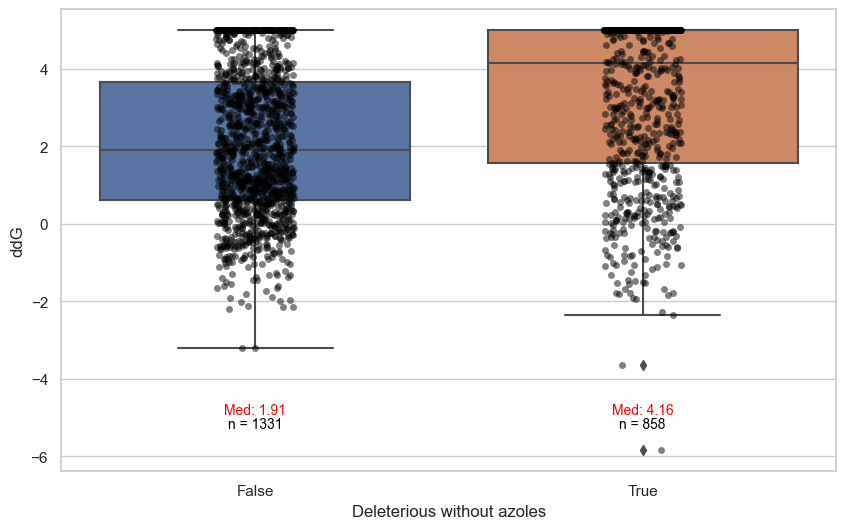

In [9]:
from scipy.stats import mannwhitneyu

# Assuming merged_df_del_all is your DataFrame
# Replace 'Deleterious without azoles', 'ddG', and 5 with the actual column names and threshold in your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

merged_df_del = merged_df_del_all
merged_df_del['ddG'] = np.where(merged_df_del['ddG'] > 5, 5, merged_df_del['ddG'])

# Get the order of categories based on counts
sorted_categories = merged_df_del['Deleterious without azoles'].value_counts().index

# Create a categorical variable with sorted categories
merged_df_del['Deleterious without azoles'] = pd.Categorical(merged_df_del['Deleterious without azoles'], categories=sorted_categories, ordered=True)

# Sort the DataFrame based on the order of categories
merged_df_del = merged_df_del.sort_values(by='Deleterious without azoles')

# Create the boxplot
ax = sns.boxplot(x="Deleterious without azoles", y="ddG", data=merged_df_del)

# Add points on the boxplot
sns.stripplot(x="Deleterious without azoles", y="ddG", data=merged_df_del, order=sorted_categories, color='black', jitter=True, alpha=0.5)

# Get medians and counts in the sorted order
medians = merged_df_del.groupby(['Deleterious without azoles'])["ddG"].median().values
nobs = merged_df_del.groupby(['Deleterious without azoles']).size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

# Add annotations
fixed_y = -5
for tick, category in enumerate(sorted_categories):
    ax.text(tick, fixed_y, nobs[tick], color='black', ha='center', va='top', fontsize=10)
    ax.text(tick, fixed_y, f'Med: {medians[tick]:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Statistical tests
for i in range(len(sorted_categories) - 1):
    for j in range(i + 1, len(sorted_categories)):
        category1 = sorted_categories[i]
        category2 = sorted_categories[j]
        
        group1 = merged_df_del[merged_df_del['Deleterious without azoles'] == category1]['ddG']
        group2 = merged_df_del[merged_df_del['Deleterious without azoles'] == category2]['ddG']
        
        _, p_value = mannwhitneyu(group1, group2)
        
        print(f"Mann-Whitney U test between {category1} and {category2}: p-value = {p_value}")

plt.show()


In [12]:
#group by antifungals

merged_df_group = merged_df.dropna().groupby("Antifungal_dms")

df_itra = merged_df_group.get_group("Itra").reset_index()


In [16]:
df_none = df_none[df_none['variant'].isin(df_itra['variant_dms'])]

df_none

,level_0,index,Unnamed: 0.1,Unnamed: 0,position,Antifungal,aa,select_coef,p_value,adjusted_p_value,variant,result,aa_WT,name
1,1,1,1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,Neutral,I,55A_None
2,2,2,2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,Neutral,I,55C_None
3,3,3,3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,Deleterious,I,55D_None
4,4,4,4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,Neutral,I,55E_None
5,5,5,5,5,55,None,F,-0.007514,4.279324e-01,6.699669e-01,55F,Neutral,I,55F_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,3825,4017,4017,4017,511,None,S,-0.027139,1.626092e-03,6.210924e-03,511S,Deleterious,L,511S_None
3826,3826,4018,4018,4018,511,None,T,-0.021492,4.567569e-03,1.635361e-02,511T,Neutral,L,511T_None
3827,3827,4019,4019,4019,511,None,V,-0.008682,3.179706e-01,5.618751e-01,511V,Neutral,L,511V_None
3828,3828,4020,4020,4020,511,None,W,-0.042223,1.157253e-02,3.861880e-02,511W,Neutral,L,511W_None


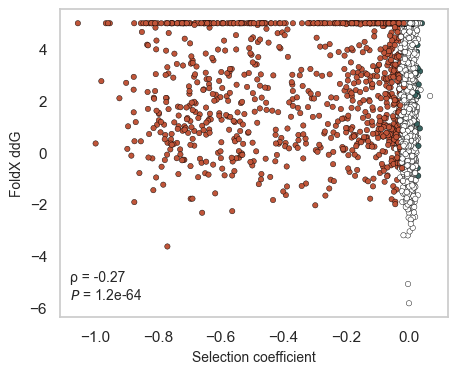

In [17]:
import numpy as np
df_itra['ddG'] = np.where(df_itra['ddG'] > 5, 5, df_itra['ddG'])#round ddG to 5

# Remove the grid
sns.set_theme(style="whitegrid")  
fig, axes = plt.subplots(figsize=(5, 4))

custom_palette = sns.blend_palette(["#FFFFFF","#C15539","#386461"], n_colors=3)

sns.scatterplot(y=df_itra["ddG"],x=df_none["select_coef"],hue=df_none["result"],edgecolor="black", palette=custom_palette,
               s=15,legend=False)

result = sp.stats.spearmanr(df_none.dropna()["select_coef"], merged_df.dropna()["ddG"]) #calculate on raw data not on rounded
coeff = result[0]
p_value = "{:.1e}".format(result[1])
R2 = coeff**2

plt.ylabel("FoldX ddG", fontsize=10)
plt.xlabel("Selection coefficient", fontsize=10)   
# Remove the grid using Matplotlib
plt.grid(False)     
text = "ρ = " + str(round(coeff, 2))
plt.text(-1.08,-5, text , fontsize = 10)
text_p_value = '$\it{P}$'+" = " + str(p_value)
plt.text(-1.08, -5.7, text_p_value, fontsize=10)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('correl_foldx_dms_caerg11.svg', format='svg', dpi=300)
plt.savefig('correl_foldx_dms_caerg11.png', format='png', dpi=300)